In [30]:
import polar_codes
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time

In [3]:
def add_noise(signal, sigma, N):
    noise = np.random.normal(scale=sigma, size=(1, N))
    return signal + noise

In [57]:
def to_EbN0(snr):
    R = 0.5
    Var = 1 / (2 * R * np.power(10.0, snr / 10.0))
    sigma = np.power(Var, 1 / 2)
    return snr*2*sigma/R

In [90]:
def run(SNR_in_db):
    iterations = 60
    N = 1024       # code length
    R = 0.5         # code rate
    epsilon = 0.45   # cross-over probability for a BEC
    Var = 1 / (2 * R * pow(10.0, SNR_in_db / 10.0))
    sigma = pow(Var, 1 / 2)

    B_N = polar_codes.permutation_matrix(N)
    frozen_indexes = polar_codes.generate_frozen_set_indexes(N, R, epsilon)
    G = polar_codes.generate_G_N(N)

    message = polar_codes.random_message_with_frozen_bits(N, R, epsilon, frozen_indexes)
    codeword = polar_codes.encode(message, G)
    signal = codeword * (-2) + 1
    signal = add_noise(signal, sigma, N)
    decoded_message = polar_codes.decode(signal, iterations, frozen_indexes, B_N, sigma)
    
    return list(message == decoded_message).count(False) 

In [92]:
def test(SNR):
    N = 1024
    attemps = 1000
    error_count = 0
    error_frame = 0

    for i in range(attemps):
        run_value = run(SNR)
        error_count += run_value
        if run_value != 0:
            error_frame += 1

    BER = error_count / (N * attemps)
    FER = error_frame / attemps

    return BER, FER

In [93]:
def sweep_test(start, stop, step):
    BERs = {}
    FERs = {}
    it = 0
    for snr in np.arange(start, stop, step):
        start_time = time.time()
        it += 1
        print("iteration {} from {}".format(it, round((stop - start)/step)))
        BERs[snr], FERs[snr] = test(snr)
        print("snr = {}, BER = {}, FER = {}".format(snr, BERs[snr], FERs[snr]))
        print("time for iter {}: ".format(it), time.time()-start_time)
    return BERs, FERs

In [94]:
result_60 = sweep_test(0, 4, 0.1)

iteration 1 from 40
snr = 0.0, BER = 0.2417666015625, FER = 1.0
time for iter 1:  188.87109184265137
iteration 2 from 40
snr = 0.1, BER = 0.2411650390625, FER = 1.0
time for iter 2:  184.70683598518372
iteration 3 from 40
snr = 0.2, BER = 0.2395625, FER = 0.999
time for iter 3:  187.19626712799072
iteration 4 from 40
snr = 0.30000000000000004, BER = 0.2387080078125, FER = 1.0
time for iter 4:  187.65897703170776
iteration 5 from 40
snr = 0.4, BER = 0.2363974609375, FER = 0.995
time for iter 5:  203.7182478904724
iteration 6 from 40
snr = 0.5, BER = 0.233046875, FER = 0.992
time for iter 6:  185.78909420967102
iteration 7 from 40
snr = 0.6000000000000001, BER = 0.23006640625, FER = 0.992
time for iter 7:  187.75577425956726
iteration 8 from 40
snr = 0.7000000000000001, BER = 0.2216337890625, FER = 0.978
time for iter 8:  189.35575604438782
iteration 9 from 40
snr = 0.8, BER = 0.213994140625, FER = 0.975
time for iter 9:  180.91240787506104
iteration 10 from 40
snr = 0.9, BER = 0.2073056

In [17]:
result = sweep_test(0, 4, 0.1)
result

iteration 1 from 40
snr = 0.0, BER = 0.24043359375, FER = 1.0
time for iter 1:  141.09773683547974
iteration 2 from 40
snr = 0.1, BER = 0.2406416015625, FER = 1.0
time for iter 2:  139.16087794303894
iteration 3 from 40
snr = 0.2, BER = 0.2395224609375, FER = 1.0
time for iter 3:  136.85368084907532
iteration 4 from 40
snr = 0.30000000000000004, BER = 0.238919921875, FER = 1.0
time for iter 4:  136.29554080963135
iteration 5 from 40
snr = 0.4, BER = 0.237130859375, FER = 1.0
time for iter 5:  141.11094498634338
iteration 6 from 40
snr = 0.5, BER = 0.233345703125, FER = 0.998
time for iter 6:  136.78910899162292
iteration 7 from 40
snr = 0.6000000000000001, BER = 0.2294306640625, FER = 0.995
time for iter 7:  135.4853789806366
iteration 8 from 40
snr = 0.7000000000000001, BER = 0.2241025390625, FER = 0.991
time for iter 8:  158.67059302330017
iteration 9 from 40
snr = 0.8, BER = 0.219037109375, FER = 0.981
time for iter 9:  144.4824481010437
iteration 10 from 40
snr = 0.9, BER = 0.21187

({0.0: 0.24043359375,
  0.1: 0.2406416015625,
  0.2: 0.2395224609375,
  0.30000000000000004: 0.238919921875,
  0.4: 0.237130859375,
  0.5: 0.233345703125,
  0.6000000000000001: 0.2294306640625,
  0.7000000000000001: 0.2241025390625,
  0.8: 0.219037109375,
  0.9: 0.2118779296875,
  1.0: 0.201466796875,
  1.1: 0.184271484375,
  1.2000000000000002: 0.1695908203125,
  1.3: 0.1455400390625,
  1.4000000000000001: 0.1254189453125,
  1.5: 0.1118759765625,
  1.6: 0.0956162109375,
  1.7000000000000002: 0.0702275390625,
  1.8: 0.059,
  1.9000000000000001: 0.0379794921875,
  2.0: 0.026716796875,
  2.1: 0.0185341796875,
  2.2: 0.0136142578125,
  2.3000000000000003: 0.01023046875,
  2.4000000000000004: 0.0044306640625,
  2.5: 0.0031611328125,
  2.6: 0.0035048828125,
  2.7: 0.00127734375,
  2.8000000000000003: 0.0014482421875,
  2.9000000000000004: 0.00067578125,
  3.0: 0.0001005859375,
  3.1: 0.0001708984375,
  3.2: 7.6171875e-05,
  3.3000000000000003: 0.000248046875,
  3.4000000000000004: 8.3984375

In [83]:
pick = pd.read_pickle('res.pkl')
data_30 = pd.read_pickle('data_30.pickle')

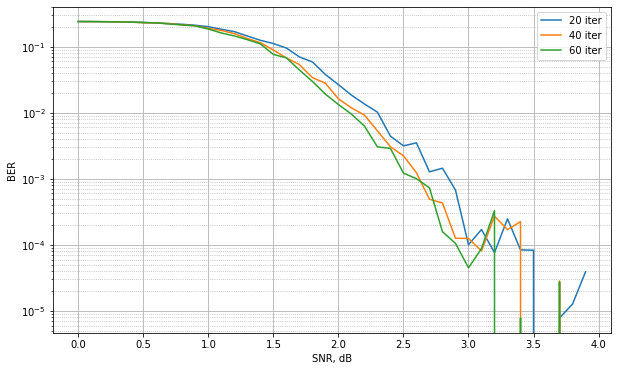

In [96]:
X_20 = list(result[0].keys())
Y_20 = list(result[0].values())

X_40 = list(pick[0].keys())
Y_40 = list(pick[0].values())

X_60 = list(result_60[0].keys())
Y_60 = list(result_60[0].values())

plt.figure(figsize = (10,6))
plt.xlabel('SNR, dB')
plt.ylabel('BER')
plt.plot(X_20, Y_20)
plt.plot(X_40, Y_40)
plt.plot(X_60, Y_60)
plt.yscale('log')
plt.legend(['20 iter', '40 iter', '60 iter'])
plt.grid(which='minor', linestyle=':')
plt.grid(which="major")
plt.savefig('pic/BER.jpg', dpi = 400)

plt.show()

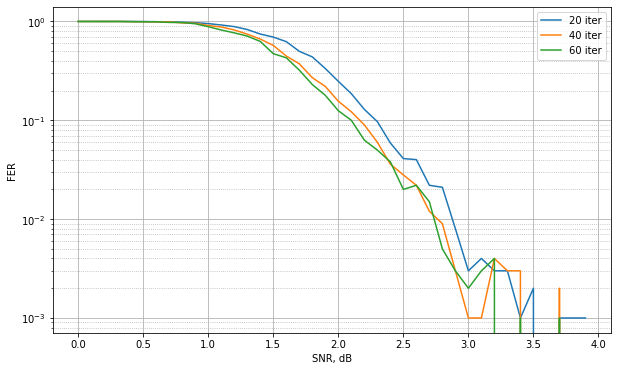

In [97]:
X_20 = list(result[1].keys())
Y_20 = list(result[1].values())

X_40 = list(pick[1].keys())
Y_40 = list(pick[1].values())

X_60 = list(result_60[1].keys())
Y_60 = list(result_60[1].values())

plt.figure(figsize = (10,6))
plt.xlabel('SNR, dB')
plt.ylabel('FER')
plt.plot(X_20, Y_20)
plt.plot(X_40, Y_40)
plt.plot(X_60, Y_60)
plt.yscale('log')
plt.legend(['20 iter', '40 iter', '60 iter'])
plt.grid(which='minor', linestyle=':')
plt.grid(which="major")
plt.savefig('pic/FER.jpg', dpi = 400)

plt.show()

## Task 2

In [36]:
frozen = []
with open("frozen.txt", 'r') as file:
    frozen = np.array(list(map(lambda x: int(x), file.read().split(','))))

frozen

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  28,
        32,  33,  34,  35,  36,  37,  38,  40,  41,  42,  44,  48,  49,
        50,  52,  56,  64,  65,  66,  67,  68,  69,  70,  72,  73,  74,
        76,  80,  81,  82,  84,  88,  96,  97,  98, 100, 104, 112])

In [29]:
codes = [] 

with open("RM_3_7_.txt", 'r') as file: 
    codes = file.read().split('\n') 
i = 0 
for item in codes: 
    codes[i] = list(map(lambda x: int(x), item.split())) 
    i += 1 
codes = np.array(codes) 
codes

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [41]:
def run(SNR_in_db):
    iterations = 20
    N = 128       # code length
    R = 0.5         # code rate
    epsilon = 0.45   # cross-over probability for a BEC
    Var = 1 / (2 * R * pow(10.0, SNR_in_db / 10.0))
    sigma = pow(Var, 1 / 2)

    B_N = polar_codes.permutation_matrix(N)
    frozen_indexes = frozen
    G = polar_codes.generate_G_N(N)

    message = polar_codes.random_message_with_frozen_bits(N, R, epsilon, frozen_indexes)
    codeword = polar_codes.encode(message, G)
    signal = codeword * (-2) + 1
    signal = add_noise(signal, sigma, N)
    decoded_message = polar_codes.decode(signal, iterations, frozen_indexes, B_N, sigma)
    
    return list(message == decoded_message).count(False) 

In [50]:
result_2 = sweep_test(0, 4, 0.1)

iteration 1 from 40
snr = 0.0, BER = 0.218765625, FER = 0.965
time for iter 1:  6.052819013595581
iteration 2 from 40
snr = 0.1, BER = 0.2191328125, FER = 0.966
time for iter 2:  6.385056018829346
iteration 3 from 40
snr = 0.2, BER = 0.2160234375, FER = 0.95
time for iter 3:  5.761837959289551
iteration 4 from 40
snr = 0.30000000000000004, BER = 0.2086796875, FER = 0.946
time for iter 4:  5.848243951797485
iteration 5 from 40
snr = 0.4, BER = 0.2109296875, FER = 0.932
time for iter 5:  5.742950201034546
iteration 6 from 40
snr = 0.5, BER = 0.2120625, FER = 0.927
time for iter 6:  5.867231845855713
iteration 7 from 40
snr = 0.6000000000000001, BER = 0.1993125, FER = 0.898
time for iter 7:  5.757235050201416
iteration 8 from 40
snr = 0.7000000000000001, BER = 0.1975, FER = 0.89
time for iter 8:  5.823232889175415
iteration 9 from 40
snr = 0.8, BER = 0.191859375, FER = 0.869
time for iter 9:  6.199631929397583
iteration 10 from 40
snr = 0.9, BER = 0.187109375, FER = 0.866
time for iter 10

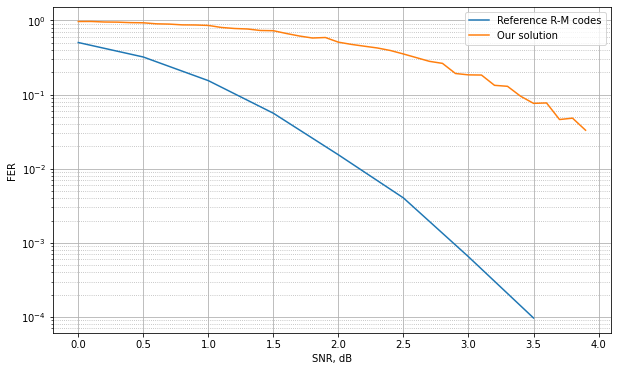

In [72]:
ref = pd.read_csv('reference.csv')
X_ref = ref['Eb/N0 (dB)']
Y_ref = ref['FER']

X = np.array(list(result_2[1].keys()))
Y = np.array(list(result_2[1].values()))

plt.figure(figsize = (10,6))
plt.xlabel('SNR, dB')
plt.ylabel('FER')
plt.plot(X_ref, Y_ref)
plt.plot(X, Y)
plt.yscale('log')
plt.legend(['Reference R-M codes', 'Our solution'])
plt.grid(which='minor', linestyle=':')
plt.grid(which="major")
plt.savefig('pic/ref_our.jpg', dpi = 400)

plt.show()